In [1]:
import pandas as pd

In [2]:
url_pets = "https://raw.githubusercontent.com/praktikum-hackathon/hackathon/dev/Research/data/pets.csv"
url_transactions = "https://raw.githubusercontent.com/praktikum-hackathon/hackathon/dev/Research/data/transactions.csv"
url_pricing = "https://raw.githubusercontent.com/praktikum-hackathon/hackathon/dev/Research/data/pricing.csv"

In [3]:
pets = pd.read_csv(url_pets)
transactions = pd.read_csv(url_transactions)
pricing = pd.read_csv(url_pricing)

In [4]:
len(pets)

1554

In [5]:
pets.columns = ['id', 'nickname', 'profile_link', 'shelter', 
        'city', 'breed', 'type', 'birthday', 'sex', 
        'favorite', 'home', 'homeless', 'walk']

In [6]:
cats = pets[pets['type'] == 'Кошки']

In [7]:
cats_female = cats[cats['sex'] == 'девочка']

In [8]:
cats_male = cats[cats['sex'] == 'мальчик']

In [9]:
len(cats_female), len(cats_male)

(812, 587)

In [10]:
cats_male_home = cats_male[cats_male['home'] == 1]

In [11]:
cats_male_homeless = cats_male[cats_male['home'] != 1]

In [12]:
cats_female_home = cats_female[cats_female['home'] == 1]

In [13]:
cats_female_homeless = cats_female[cats_female['home'] != 1]

In [14]:
len(cats_female_homeless) + len(cats_female_home)

812

In [15]:
len(cats_male_homeless) + len(cats_male_home)

587

In [16]:
len(cats_male_home), len(cats_female_home)

(466, 607)

In [17]:
len(cats_male_homeless), len(cats_female_homeless)

(121, 205)

In [18]:
len(cats_male), len(cats_female)

(587, 812)

In [19]:
data = {'male': [len(cats_male_home),len(cats_male_homeless)],
'female': [len(cats_female_home),len(cats_female_homeless)]}

sex_home = pd.DataFrame(data, columns = ['male', 'female'], index=['home', 'homeless'])

In [20]:
sex_home = sex_home.T

In [21]:
sex_home

,home,homeless
male,466,121
female,607,205


In [22]:
sex_home['total'] = sex_home['home'] + sex_home['homeless']

In [23]:
sex_home['home_ratio'] = sex_home['home'] / sex_home['total']

In [24]:
sex_home

,home,homeless,total,home_ratio
male,466,121,587,0.793867
female,607,205,812,0.747537


In [25]:
sex_home['homeless_ratio'] = sex_home['homeless'] / sex_home['total']

In [26]:
len(cats)

1399

In [27]:
sex_home.to_csv('distribution_by_sex')

In [28]:
import matplotlib.pyplot as plt

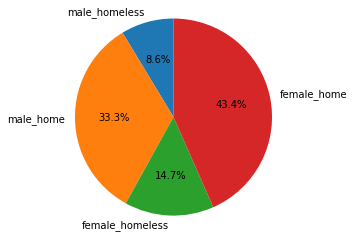

In [29]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['male_homeless', 'male_home', 'female_homeless', 'female_home']
sizes = [sex_home['homeless']['male'], sex_home['home']['male'], sex_home['homeless']['female'], sex_home['home']['female']]
explode = (0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [30]:
sex_home = sex_home.T[0:2]

In [31]:
sex_home.to_csv('distribution_by_sex.csv')

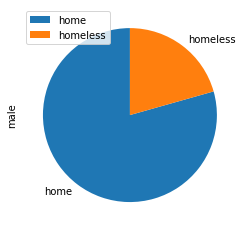

In [32]:
sex_home.plot(kind='pie', y='male', startangle=90)
plt.show()

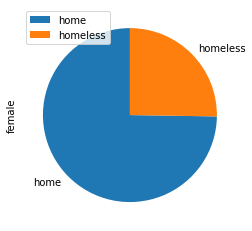

In [33]:
sex_home.plot(kind='pie', y='female', startangle=90)

plt.show()

In [34]:
import plotly.express as px

In [35]:
sex_home

,male,female
home,466.0,607.0
homeless,121.0,205.0


In [ ]:
sex_home.to_csv('')

In [36]:
sex_home.columns = ['мальчики', 'девочки']
sex_home.index = ['с домом', 'без дома']

In [54]:
sex_home.to_csv('distribution_by_sex_ru.csv')

In [49]:
colors = ['yellowgreen', 'lightcoral'] 

In [50]:
fig = px.pie(sex_home, values=sex_home['мальчики'], names=sex_home.index, hole=0.4)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.update_layout(title_text="<b>Мальчики с домом, без дома</b>", 
                  title_x=0.5, title_font_color='darkgoldenrod', 
                  title_font_size=18,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  annotations=[dict(text='Всего', x=0.5, y=0.53, font_size=16, showarrow=False),
                  dict(text='{}'.format(sex_home['мальчики'].sum().astype(int)),x=0.5, y=0.48, font_size=18, showarrow=False)],
                  margin=dict(t=30, b=0, l=0, r=0))
fig.show()

In [51]:
fig.write_html("C://Users//ww//Documents//Github//hackathon//Research//cats_male_plotly.html", 
               include_plotlyjs="cdn")

In [52]:
fig = px.pie(sex_home, values=sex_home['девочки'], names=sex_home.index, hole=0.4)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.update_layout(title_text="<b>Девочки с домом, без дома</b>", 
                  title_x=0.5, title_font_color='darkgoldenrod', 
                  title_font_size=18,
                  legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                  annotations=[dict(text='Всего', x=0.5, y=0.53, font_size=16, showarrow=False),
                  dict(text='{}'.format(sex_home['девочки'].sum().astype(int)), x=0.5, y=0.48, font_size=18, showarrow=False)],
                  margin=dict(t=30, b=0, l=0, r=0))
fig.show()

In [53]:
fig.write_html("C://Users//ww//Documents//Github//hackathon//Research//cats_female_plotly.html", 
               include_plotlyjs="cdn")

In [43]:
df = pets.groupby('city')['shelter'].count()

In [44]:
df = pets.groupby('shelter')['city'].count()

In [45]:
df = pets.groupby('city')['shelter']

In [46]:
df

In [47]:
pets[pets['shelter'] == 'Котофей'].head(50)

,id,nickname,profile_link,shelter,city,breed,type,birthday,sex,favorite,home,homeless,walk
325,328,Соня,https://teddyfood.com/ru/animals/Sonia_p/,Котофей,Пермь,Без породы,Кошки,2015-06-20,девочка,6,1,0,0
326,329,Амур,https://teddyfood.com/ru/animals/Amur/,Котофей,Пермь,Без породы,Кошки,2016-02-20,мальчик,2,1,0,0
341,345,Аватар,https://teddyfood.com/ru/animals/Avatar/,Котофей,Пермь,Без породы,Кошки,2015-07-20,мальчик,0,1,0,0
343,347,Кузина,https://teddyfood.com/ru/animals/Cousina/,Котофей,Пермь,Без породы,Кошки,2011-04-20,девочка,3,1,0,0
349,353,Пьер,https://teddyfood.com/ru/animals/Pierre/,Котофей,Пермь,Без породы,Кошки,2013-08-20,мальчик,2,1,0,0
359,363,Мандаринка,https://teddyfood.com/ru/animals/Mandarinka/,Котофей,Пермь,Без породы,Кошки,2015-10-10,девочка,10,1,0,0
360,364,Сникерс,https://teddyfood.com/ru/animals/Snickers/,Котофей,Пермь,Без породы,Кошки,2016-08-20,мальчик,6,1,0,1
361,365,Канапешка,https://teddyfood.com/ru/animals/Kanapeshka/,Котофей,Пермь,Без породы,Кошки,2015-06-20,девочка,3,1,0,0
383,387,Феликс,https://teddyfood.com/ru/animals/Felix_p/,Котофей,Пермь,Без породы,Кошки,2016-05-20,мальчик,4,1,0,0
388,392,Вася,https://teddyfood.com/ru/animals/Vasya_cat/,Котофей,Пермь,Без породы,Кошки,2015-05-20,мальчик,1,1,0,0


In [48]:
data_pivot = data.pivot_table(index = ['column1', 'column2'], columns = 'source',
values = 'column_pivot', aggfunc = 'function')
# index - столбец или столбцы, по которым происходит группировка данных
# columns - столбец по значениям которого будет происходить группировка
# values - значения, по которым мы хотим увидеть сводную таблицу
# aggfunc - функция, которая будет применяться к значениям

AttributeError: 'dict' object has no attribute 'pivot_table'